### Comparing Different Frameworks of Recurrent Neural Network Using Bike Rental Data (SimpleRNN, LSTM and GRU)

## Description of Data

The data contains variables that relate to a daily Bike sharing system. It contains variables that possibly influence the number of rentals in a typical day. Explanations of some variables are the current season, if the day is a holiday or not, the month, the day of the week, the average temperature, windspeed and humidity of the day, etc.

The data is 2 years daily data. The number of samples is 731. We have split it into 631, 100, as train, and test data respectively


In [74]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
import keras
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.callbacks import LambdaCallback
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

## The Models
The SImpleRNN, Long Short-Term Memory model, and Gated Recurrent Unit of Recurrent Neural Network (RNN) were used in this report.  The models featured 4 nodes. Each batch comprises 10 timesteps, utilizing the Relu activation function for output layers. The optimizer is set to adam, with a mean squared error loss function. A learning rate of 0.0001 is applied, and the model undergoes training for 500 epochs.

In [75]:
import warnings
warnings.filterwarnings('ignore')

# loading data
dat = pd.read_csv("day.csv")
temp = dat[dat.yr == 1]
temp = temp[temp.mnth == 10]
dat['cnt'][667] = 6414
dat['cnt'][668] = 6414

In [76]:
# Processing data
one_hot = pd.get_dummies(dat['weekday'], prefix='weekday')
dat = dat.join(one_hot)

one_hot = pd.get_dummies(dat['weathersit'], prefix='weathersit')

dat = dat.join(one_hot)

one_hot = pd.get_dummies(dat['mnth'], prefix='mnth')
dat = dat.join(one_hot)


In [77]:
# Scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array(dat['cnt']).reshape(len(dat['cnt']), 1))
series = pd.DataFrame(scaled)
series.columns = ['cntscl']

In [78]:
# Data Merge
dat = pd.merge(dat, series, left_index=True, right_index=True)

In [79]:
# Data Split
number_of_test_data = 100

number_of_training_data = len(dat) - number_of_test_data

datatrain = dat[:-number_of_test_data]
datatest = dat[-number_of_test_data:]

In [81]:
# Data Processing
in_seq1 = array(datatrain['holiday'])
in_seq2 = array(datatrain['workingday'])
in_seq3 = array(datatrain['temp'])
in_seq4 = array(datatrain['atemp'])
in_seq5 = array(datatrain['hum'])
in_seq6 = array(datatrain['windspeed'])
in_seq7 = array(datatrain['weekday_0'])
in_seq8 = array(datatrain['weekday_1'])
in_seq9 = array(datatrain['weekday_2'])
in_seq10 = array(datatrain['weekday_3'])
in_seq11 = array(datatrain['weekday_4'])
in_seq12 = array(datatrain['weekday_5'])
in_seq13 = array(datatrain['weekday_6'])
in_seq14 = array(datatrain['weathersit_1'])
in_seq15 = array(datatrain['weathersit_2'])
in_seq16 = array(datatrain['weathersit_3'])
out_seq_train = array(datatrain['cntscl'])

In [83]:
# Data Processing
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
in_seq15 = in_seq15.reshape((len(in_seq15), 1))
in_seq16 = in_seq16.reshape((len(in_seq16), 1))
out_seq_train = out_seq_train.reshape((len(out_seq_train), 1))

In [84]:
# Data Processing
datatrain_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8,
                        in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, in_seq15, in_seq16, out_seq_train))

in_seq1 = array(datatest['holiday'])
in_seq2 = array(datatest['workingday'])
in_seq3 = array(datatest['temp'])
in_seq4 = array(datatest['atemp'])
in_seq5 = array(datatest['hum'])
in_seq6 = array(datatest['windspeed'])
in_seq7 = array(datatest['weekday_0'])
in_seq8 = array(datatest['weekday_1'])
in_seq9 = array(datatest['weekday_2'])
in_seq10 = array(datatest['weekday_3'])
in_seq11 = array(datatest['weekday_4'])
in_seq12 = array(datatest['weekday_5'])
in_seq13 = array(datatest['weekday_6'])
in_seq14 = array(datatest['weathersit_1'])
in_seq15 = array(datatest['weathersit_2'])
in_seq16 = array(datatest['weathersit_3'])
out_seq_test = array(datatest['cntscl'])


in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
in_seq15 = in_seq15.reshape((len(in_seq15), 1))
in_seq16 = in_seq16.reshape((len(in_seq16), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))


datatest_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8,
                       in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, in_seq15, in_seq16, out_seq_test))

In [85]:
n_features = datatrain_feed.shape[1]
n_input = 10
generator_train = TimeseriesGenerator(
    datatrain_feed, out_seq_train, length=n_input, batch_size=len(datatrain_feed))

generator_test = TimeseriesGenerator(
    datatest_feed, out_seq_test, length=n_input, batch_size=1)

<h1> Simple RNN</h1>

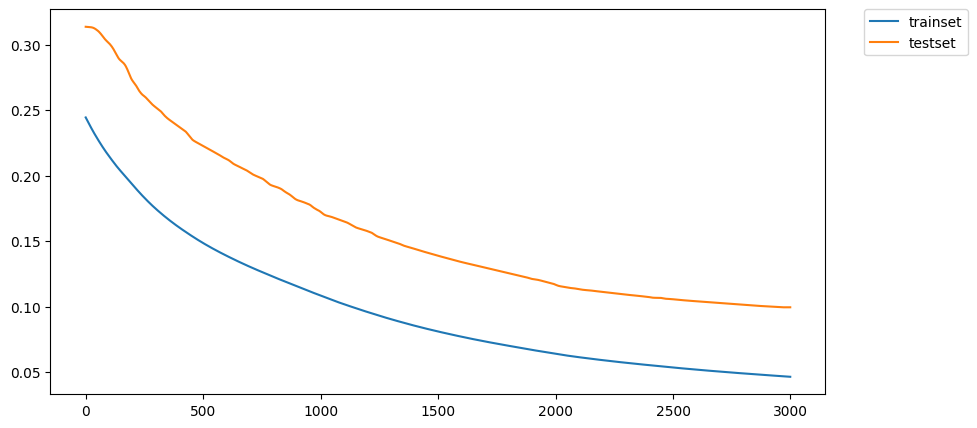

In [86]:
# Simple RNN
model = Sequential()

model.add(SimpleRNN(4, activation='relu', input_shape=(
    n_input, n_features), return_sequences=False))
model.add(Dense(1, activation='relu'))

adam = Adam(learning_rate=0.0001)

model.compile(optimizer=adam, loss='mse')
score1 = model.fit(generator_train, epochs=3000, verbose=0,
                  validation_data=generator_test)
losses = score1.history['loss']
val_losses = score1.history['val_loss']
plt.figure(figsize=(10, 5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Observation from the Train and Testing Plot for SImpleRNN
It is observed that the training and the testing line trended apart which suggests that the prediction accuracy is not likely to be good. The fact that there is substantial dispersion between the training set and the testing set where the training set is higher throughout the 3000 epochs that were employed shows overfitting. Even though many epochs were used, the trend line of both the training and the testing sets still did not appear to stabilize or perform better by intertwining as the epochs increased. 


In [87]:
# Model evaluation
data_list = []

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=0)

    data_list.append({'Actual': scaler.inverse_transform(
        y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]})


df_result = pd.DataFrame(data_list)
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()


print("correctness: ", 100 - 100*mae/mean, "%")

correctness:  55.834493769433045 %


## Model Result from Testing Data for SimpleRNN
The testing set produced a Correctness of 55% which is quite low as evident in the model plot. The model still did not perform well even though it was a large Epoch size of 3000. A suggested solution to improve the performance of the model will be to try other RNN sequential models like Long, Short-Term Memory (LSTM) or Gated Recurrent Unit (GPU)


<h1> Long and Short Term Memory (LSTM) RNN </h1>

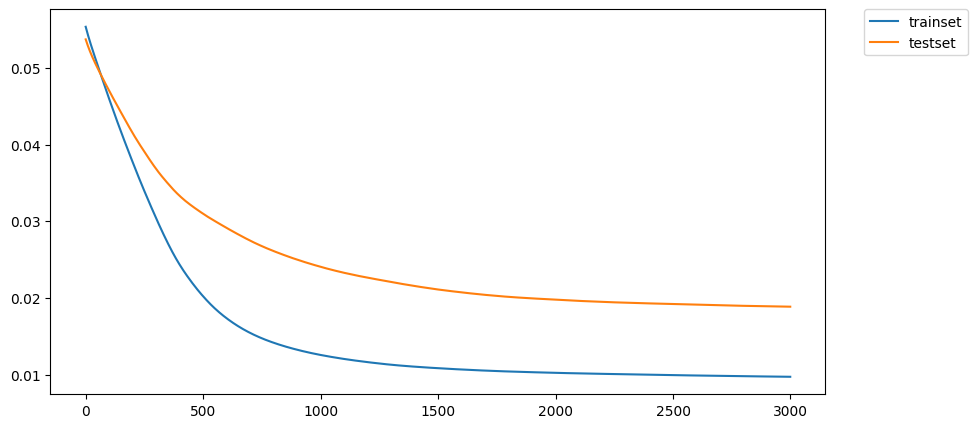

In [88]:
# LSTM RNN Model fit
model = Sequential()

model.add(LSTM(4, activation='relu', input_shape=(
    n_input, n_features), return_sequences=False))
model.add(Dense(1, activation='relu'))

adam = Adam(learning_rate=0.0001)

model.compile(optimizer=adam, loss='mse')
score2 = model.fit(generator_train, epochs=3000, verbose=0,
                  validation_data=generator_test)
losses = score2.history['loss']
val_losses = score2.history['val_loss']
plt.figure(figsize=(10, 5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Observation from the Train and Validation Plot for LSTM-RNN

In comparison with SimpleRNN above, the plot appears to be closer to each other; implying that the margin of errors is less and general less. Also, the model appeared to stabilize after 500 epochs.

In [89]:
# Model evaluation
data_list = []

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=0)

    data_list.append({'Actual': scaler.inverse_transform(
        y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]})


df_result = pd.DataFrame(data_list)

mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()


print("correctness: ", 100 - 100*mae/mean, "%")

correctness:  83.85546304222179 %


## Model Result from Testing Data (LSTM)
This shows a significant improvement from the 55% seen when SimpleRNN was used. An accuracy of 83% seems to be reasonably good but we will compare this performance with the GRU model and see which one performs best in all 3


## Gated Recurrent Unit Method (GRU) - RNN

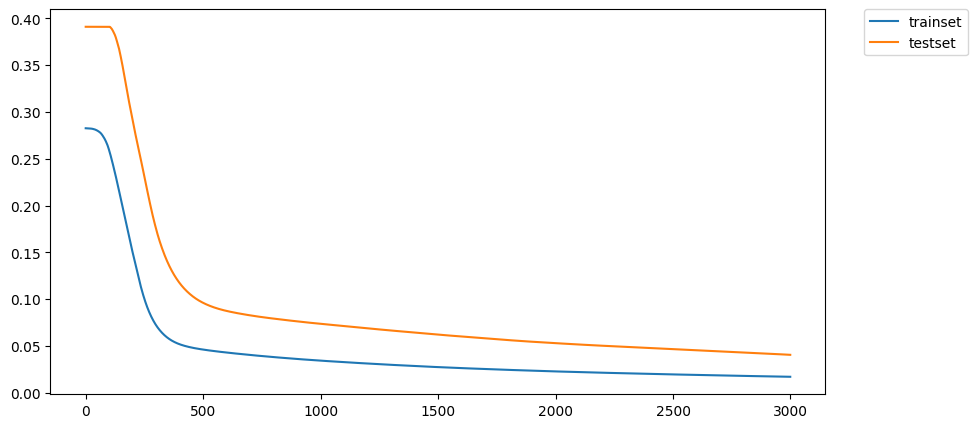

In [90]:
# The GRU RNN Model
model = Sequential()

model.add(GRU(4, activation='relu', input_shape=(
    n_input, n_features), return_sequences=False))
model.add(Dense(1, activation='relu'))

adam = Adam(learning_rate=0.0001)

model.compile(optimizer=adam, loss='mse')
score3 = model.fit(generator_train, epochs=3000, verbose=0,
                  validation_data=generator_test)
losses = score3.history['loss']
val_losses = score3.history['val_loss']
plt.figure(figsize=(10, 5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Observation from the Train and Testing Plot For GRU
.The plot shows steady improvement in the performance of the model as the epoch size increases, I appears to be very close to each other when the epoch size was around 1800. It appears to have performed reasonably well like the LSTM.  


In [91]:
# Model evaluation
data_list = []

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=0)

    data_list.append({'Actual': scaler.inverse_transform(
        y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]})


df_result = pd.DataFrame(data_list)
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()


print("correctness: ", 100 - 100*mae/mean, "%")

correctness:  71.63163341893642 %


## Model Result from Testing Data for GRU
The testing set produced a Accuracy of 71% which is quite good and a huge jump from 55% for SimpleRNN result but less than LSTM 83%. Using this timeseries data, the LSTM model performed the best and is recommended is similar analysis is to be performed in the future.
